# TP 1 - Équation de la chaleur
## $\theta$ - Shéma

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et le $\theta$-schéma  :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\theta\frac{(u_{j+1}^n-2u_j^n+u_{j-1}^n)}{\Delta x^2}-(\theta-1)\frac{(u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1})}{\Delta x^2} = 0. $$

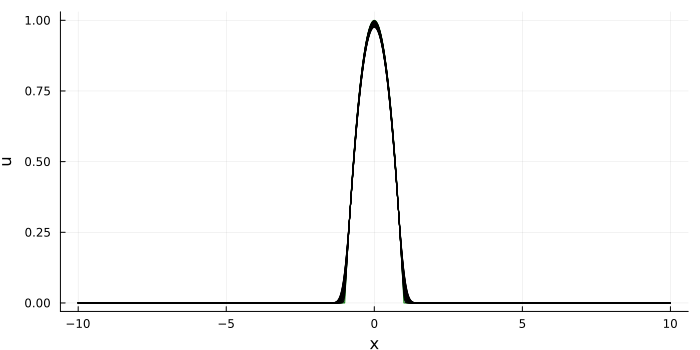

In [79]:
using LinearAlgebra, Plots

# Parameters
𝜃=0.8
L = 10.0                               # domain half size
Nx = 800                               # grid size (space)
Δx = 2*L/Nx                            # step size (space)
σ = 0.1                                # CFL
#Δt = σ * Δx^2                          # step size (time)
Δt =0.0000001
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)
A=Tridiagonal(-(1 .- 𝜃)*σ*ones(Nx), (1 .+ 2*(1 .- 𝜃)*σ)*ones(Nx+1),-(1 .- 𝜃)*σ*ones(Nx))
B = Tridiagonal(𝜃*σ*ones(Nx), 1 .- 2*σ*𝜃*ones(Nx+1), 𝜃*σ*ones(Nx))

for n = 1:Nt
    u =A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

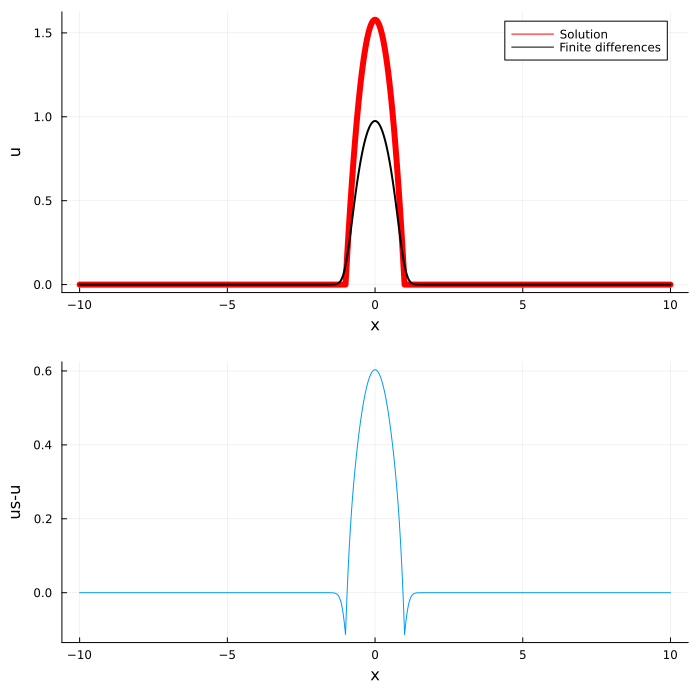

Δx: 0.025	 Δt:1.0e-7	 max error: 0.6032332453310562


In [80]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

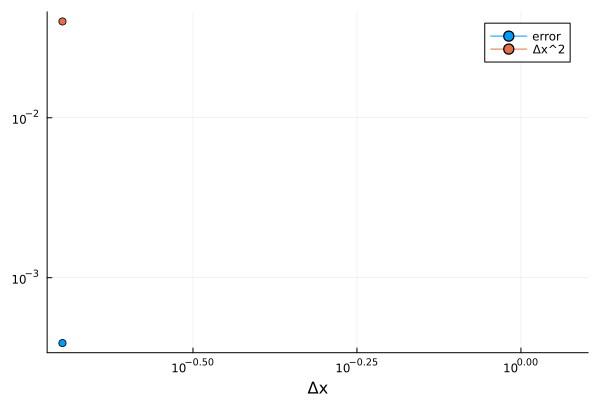

In [81]:
# Precision test
Δx = [ 0.2 ]
errx = [ 0.00039 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

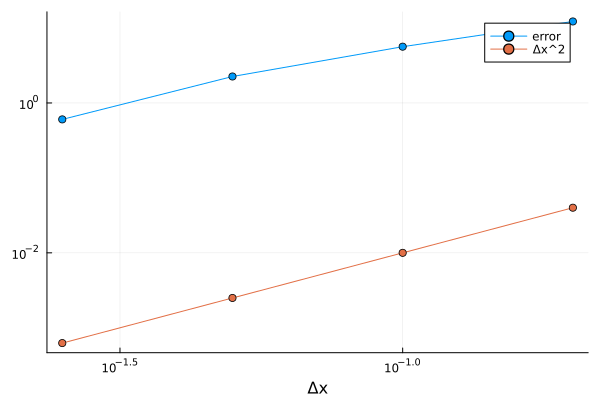

In [82]:
# Precision test
𝜃= 0.5
Δx = [ 0.2,0.1,0.05,0.025]
errx = [ 12.221870412360996,5.63140619714317, 2.253596247943712, 0.6032332453134993 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

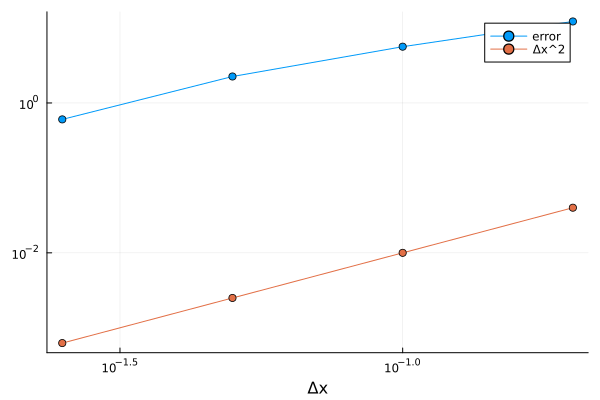

In [83]:
𝜃= 0.1
Δx = [ 0.2,0.1,0.05,0.025]
errx = [ 12.221402715286123,5.631677680107203,2.25360904993503, 0.6032332452795047 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

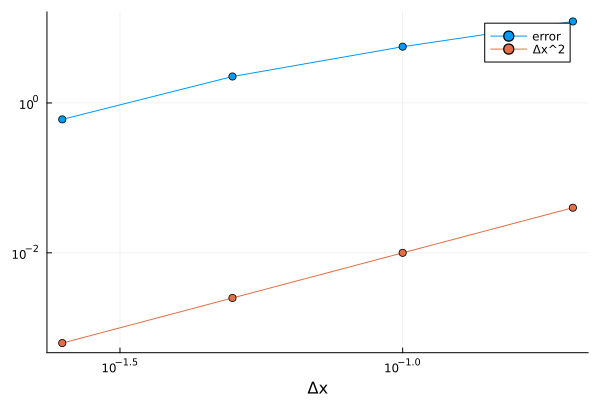

In [84]:
𝜃= 0.8
Δx = [ 0.2,0.1,0.05,0.025]
errx = [ 12.222219755291169,5.631044853804073, 2.253579069052992, 0.6032332453310562 ]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

2.Etude de precision
Pour 𝜃= 0.5.On fixe Δt=0.0000001 et on varie Δx:

- Δx: 0.2	     max error: 12.221870412360996
- Δx: 0.1	 	 max error: 5.63140619714317
- Δx: 0.05	     max error: 2.253596247943712
- Δx: 0.025	     max error: 0.6032332453134993

->Schema inconditionnellement stable.

Pour 𝜃= 0.1. On fixe Δt=0.0000001 et on varie Δx:
- Δx: 0.2		 max error: 12.221402715286123
- Δx: 0.1	     max error: 5.631044853804073
- Δx: 0.05	 	 max error: 2.253579069052992
- Δx: 0.025	 	 max error: 0.6032332452795047

-> Schema conditionnellement stable.

Pour 𝜃= 0.8. On fixe Δt=0.0000001 et on varie Δx:
- Δx: 0.2		 max error: 12.222219755291169
- Δx: 0.1	 	 max error: 5.631677680107203
- Δx: 0.05	     max error: 2.25360904993503
- Δx: 0.025	 	 max error: 0.6032332453310562

-En variant σ, on constate que lorsque σ=0.5, la solution expose.



